## Load the libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [69]:
import torch
import  torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets

#### create the tranformation object

In [70]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#### download and transform train and test dataset

In [71]:
train_data = datasets.CIFAR10('CIFAR10', train=True, transform=transform, download=True)
test_data = datasets.CIFAR10('CIFAR10', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [72]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [73]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: CIFAR10
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

#### create the data loader for both train and test

In [74]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

#### define the classes

In [75]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### View the image

#### create a function to denormalize the images and show them (with transpose done)

In [76]:
def imshow(img):
    # denormalize = img*std + mean
    img = img/2 + 0.5
    img_np = img.numpy()
    plt.imshow(np.transpose(img_np, (1, 2, 0)))

#### get the image from data loaders using iter/next and then use the fucntion

In [77]:
train_iter = iter(train_loader)

In [78]:
images, labels = next(train_iter)

In [79]:
images.shape

torch.Size([4, 3, 32, 32])

In [80]:
labels.shape

torch.Size([4])

In [81]:
images[0].shape

torch.Size([3, 32, 32])

'frog'

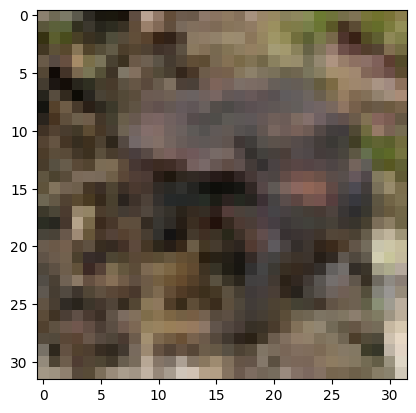

In [82]:
imshow(images[0])
classes[labels[0]]

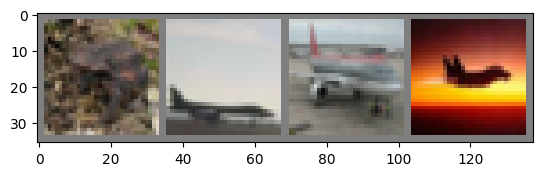

In [83]:
imshow(torchvision.utils.make_grid(images))

## Define the Neural Network

In [84]:
class ImageClassifierNeuralNetwork(nn.Module):
    def __init__(self):
        super(ImageClassifierNeuralNetwork, self).__init__()

        self.conv_1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv_2 = nn.Conv2d(6, 16, 5)
        self.fc_1 = nn.Linear(16*5*5, 120)
        self.fc_2 = nn.Linear(120, 80)
        self.fc_3 = nn.Linear(80, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv_1(x)))
        x = self.pool(F.relu(self.conv_2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        x = self.fc_3(x)
        return x


In [85]:
ICNet = ImageClassifierNeuralNetwork()

### Define the loss function and optimizer

In [86]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(ICNet.parameters(), lr=0.001, momentum=0.9)

### Train the neural network

In [ ]:
epochs = 4
for epoch in range(epochs):
    running_loss = 0.0

    for i, train_data in enumerate(train_loader, 0):
        images, labels = train_data

        optimizer.zero_grad()

        outputs = ICNet(images)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        if i % 500 == 499:
            print(epoch+1, i+1, running_loss/500)
            running_loss = 0.0



1 500 2.3022081046104432
1 1000 2.298174713134766
1 1500 2.237761662721634


## Test the neural network

In [ ]:
images, labels = next(train_iter)

In [ ]:
labels.shape

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
print(' '.join(classes[labels[i]] for i in range(4)))

In [ ]:
outputs = ICNet(images)

In [ ]:
outputs.shape

In [ ]:
_, predictions = torch.max(outputs, 1)

In [ ]:
predictions

In [ ]:
print(' '.join(classes[predictions[i]] for i in range(4)))

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for test_datas in test_loader:
        images, labels = test_datas

        test_predictions = ICNet(images)
        _, predictions = torch.max(test_predictions, 1)

        total += labels.size(0)

        correct += (predictions == labels).sum().item()


accuracy = (correct/total) * 100




In [ ]:
accuracy